In [125]:
import sinaps as sn

In [138]:
n=1 #number of couple of section Ranvier / myeline

In [139]:
ranvier_args = dict(
    L=10,#30 μm (
    a=0.7,#10μm 
    C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
    R_l=70, #(Migliore et al 2005) 150 Ω.cm
)

myeline_args = dict(
    L=1000,#1000 μm (
    a=2,#10 μm 
    C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
    R_l=70, #(Migliore et al 2005) 150 Ω.cm
)


In [140]:
N=sn.Neuron()

## Creation des sections

In [141]:

for i in range(n):
    N.add_section(sn.Section(**ranvier_args,name='ranvier_{}'.format(i)),2*i,2*i+1)
    N.add_section(sn.Section(**myeline_args,name='myeline_{}'.format(i)),2*i+1,2*i+2)
        

## Ajout des canaux

In [142]:
for i in range(n-1):
    N.sections[2*i]['obj'].add_channel_c(sn.channels.Hodgkin_Huxley())
    #N.sections[2*i+1]['obj'].add_channel_c(sn.channels.LeakChannel(0,200))# kΩ.cm2 (Migliore et al 2005) 28 kΩ.cm2
    #N.sections[2*i]['obj'].add_channel_c(sn.channels.LeakChannel(0,2))# kΩ.cm2 (Migliore et al 2005) 28 kΩ.cm2

## Ajout stimuli

In [143]:
N.sections[0]['obj'].add_channel_p(sn.channels.HeavysideCurrent(1000,10,14),x = 0)

## Simulation

In [144]:
sim=sn.Simulation(N,100)

In [145]:
sim.N

Neuron(sections=[{'i': 0, 'j': 1, 'obj': Section(name=ranvier_0, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 0, 'idV': array([0, 1]), 'idS': array([], dtype=int64)}, {'i': 1, 'j': 2, 'obj': Section(name=myeline_0, L=1 mm, a=2 um, C_m=10 fF/μm², R_l=700 kΩ.μm), 'num': 1, 'idV': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'idS': array([], dtype=int64)}])

In [146]:
sim.run((0,100),max_step=0.01)
sim.resample('0.01ms')

In [147]:
from matplotlib import pyplot as plt

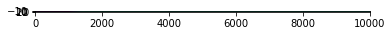

In [148]:
plt.imshow(sim.V.T)

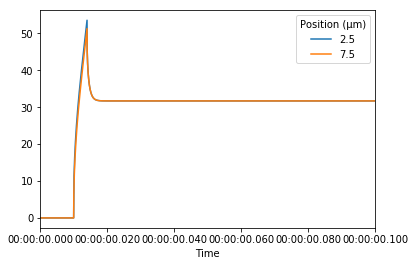

In [149]:
sim.V[0].plot()